# Solving differential equations

## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)$$

Since $ \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}$, we know that $ y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)$.

Therefore, we can repetitively iterate the propagation: 

From the value $ y_n $ at step $ n $, corresponding to the time $ t $, we can calculate the value $ y_{n+1} $ at step $ (n+1) $, corresponding to the time $ (t+h) $:

$$ y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h 

### Example 1) Radioactive decay

$ \dot{y} = -y$ or

$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y$

Analytical solution: $ y(t)=y_0 \exp(-t)$

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

Text(0, 0.5, 'Decay concentration')

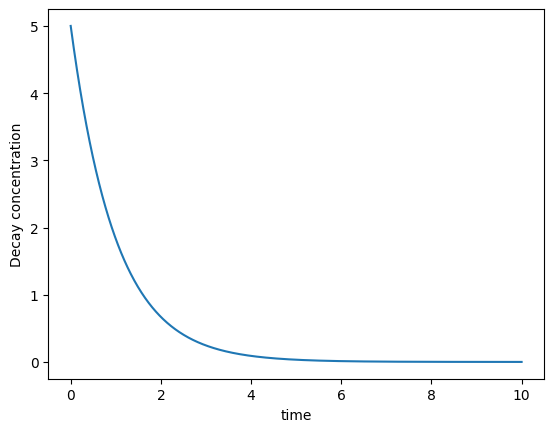

In [2]:
h = 0.01  ## step size
t_end = 10  ## total time
time_steps = int(t_end / h)    ## total time steps
lambd = 1   ## dacay constant 
N_values = np.zeros(time_steps + 1)
N_values[0] = 5  ## initial conc


t_half = np.log(2) / lambd
for i in range(time_steps):
    N_values[i+1] = N_values[i] + h*(-lambd * N_values[i])
    
plt.plot(np.linspace(0, t_end, time_steps+ 1), N_values)
plt.xlabel('time')
plt.ylabel("Decay concentration")

### Define a function "eulerODE"

In [3]:
def eulerode(f, h, N, ic):
    """ Euler ODE solver

    Args:
        f (function): function
        h (float32): step size
        N (float32): total time steps
        ic (list): initial condition [t0, y0]
    """
    t = ic[0]
    y = ic[1]
    t_values = [t]
    y_values = [y]
    for i in range(1, N+1):
        y = y + f(t, y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
        
    return t_values, y_values

### Example 2) Time-amplified decay

$\dot{y} = -ayt$ or

$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt$

Analytical solution: $ y(t)=y_0 \exp(-t^2a/2)$

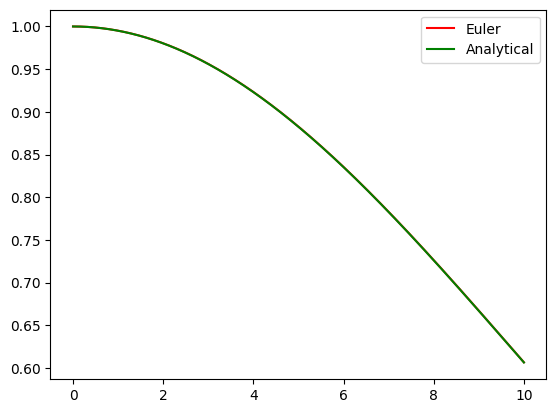

In [4]:
f = lambda t, y: -0.01*y*t
t_values, y_values = eulerode(f,0.01, 1000, [0, 1])
t_ana = np.linspace(0, 10, 1001)

def f_analytical(a,t):
    return np.exp(-t**2 * a/ 2)


plt.plot(t_values, y_values, 'red', label= 'Euler')
plt.plot(t_ana, f_analytical(0.01, t_ana), 'green', label= 'Analytical')
plt.legend()
plt.show()


## As a increases decay happens more instantly

### 1.2 Higher-order differential equations

Example: Second-order differential equation: $ y''(t) = f\left(t,y(t),y'(t)\right)$

Introduce: $ z_0(t) = y(t)$ and $ z_1(t) = y'(t)$

$$ \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}$$

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

$$ z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h $$

$$ z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h $$

Or, going back to our initial nomenclature:

$$ y_{n+1} = y_{n} + y'_{n} h $$

$$ y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h $$

In [5]:
def SecondOrder(f, N, h, ic):
    ## ic [t0, y0, y0prime]
    t = ic[0]
    y = ic[1]
    yprime = ic[2]
    y_values = [y]
    t_values = [t]
    y_prime_values = [yprime]
    for i in range(1, N+1):
        y = y + yprime * h
        yprime = yprime + f(t, yprime, y) * h
        t = t + h
        y_values.append(y)
        t_values.append(t)
        y_prime_values.append(yprime)
        
    return t_values, y_values, y_prime_values



### Example 3) Free fall

$ \ddot{y} = -g$ or

$$ \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g$$

Analytical solution: $ y(t)=-\frac{g}{2}t^2+v_0t+y_0$

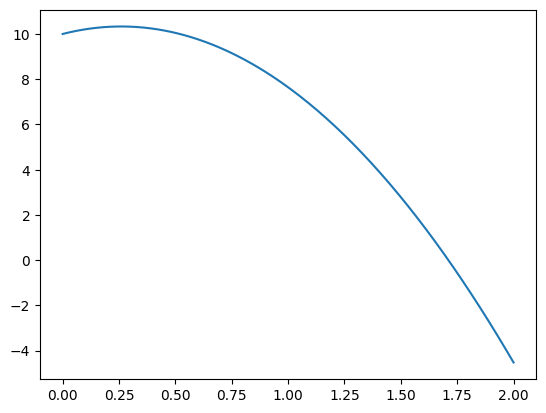

In [6]:
f = lambda t, y, yprime: -9.81

t_values, y_values, v_values = SecondOrder(f, 200, 0.01, [0, 10, 2.5])
plt.plot(t_values, y_values)

### Example 4) Harmonic oscillator

$$ \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 $$

Here, $ b $ is the damping parameter and $ c $ is determined by the pendulum length $ c = \frac{g}{l} $.

### Small-angle approximation

For small angles $\theta\ll 1 $ and without damping b = 0, we have 

$ \theta''(t) = - \frac{g}{l}\theta(t) $ with the solution (for $ \theta'(0) = 0 $)

$ \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) $ and a period of $ T = 2\pi\sqrt{\frac{l}{g}} $

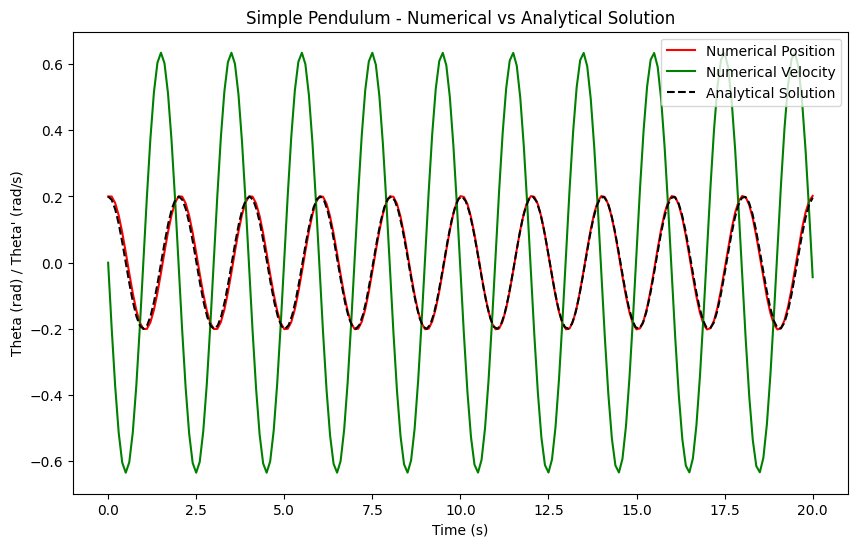

In [9]:
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1     # length of pendulum (m)
b = 0     # damping factor (zero for undamped case)
c = g / l  # natural frequency squared

# Define f for the pendulum system
def f(t, thetaprime, theta):
    return -b * thetaprime - c * theta

# Numerical solution
t_values, theta_values, thetaprime_values = SecondOrder(f, 200, 0.1, [0, 0.2, 0])

# Analytical solution
test_t = np.linspace(0, 20, 200)
analytical_theta = 0.2 * np.cos(np.sqrt(g / l) * test_t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, theta_values, 'r-', label='Numerical Position')
plt.plot(t_values, thetaprime_values, 'g-', label='Numerical Velocity')
plt.plot(test_t, analytical_theta, 'k--', label='Analytical Solution')
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad) / Theta\' (rad/s)")
plt.legend()
plt.title("Simple Pendulum - Numerical vs Analytical Solution")
plt.show()


### Actual equation

- Small starting angle

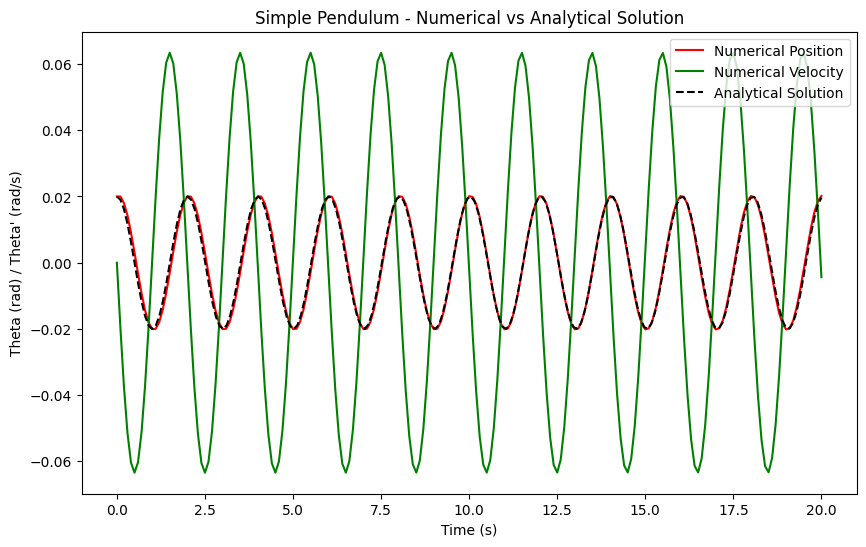

In [11]:
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1     # length of pendulum (m)
b = 0     # damping factor (zero for undamped case)
c = g / l  # natural frequency squared

# Define f for the pendulum system
def f(t, thetaprime, theta):
    return -b * thetaprime - c * theta

# Numerical solution
t_values, theta_values, thetaprime_values = SecondOrder(f, 200, 0.1, [0, 0.02, 0])   ### small starting angle

# Analytical solution
test_t = np.linspace(0, 20, 200)
analytical_theta = 0.02 * np.cos(np.sqrt(g / l) * test_t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, theta_values, 'r-', label='Numerical Position')
plt.plot(t_values, thetaprime_values, 'g-', label='Numerical Velocity')
plt.plot(test_t, analytical_theta, 'k--', label='Analytical Solution')
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad) / Theta\' (rad/s)")
plt.legend()
plt.title("Simple Pendulum - Numerical vs Analytical Solution")
plt.show()


- Large starting angle

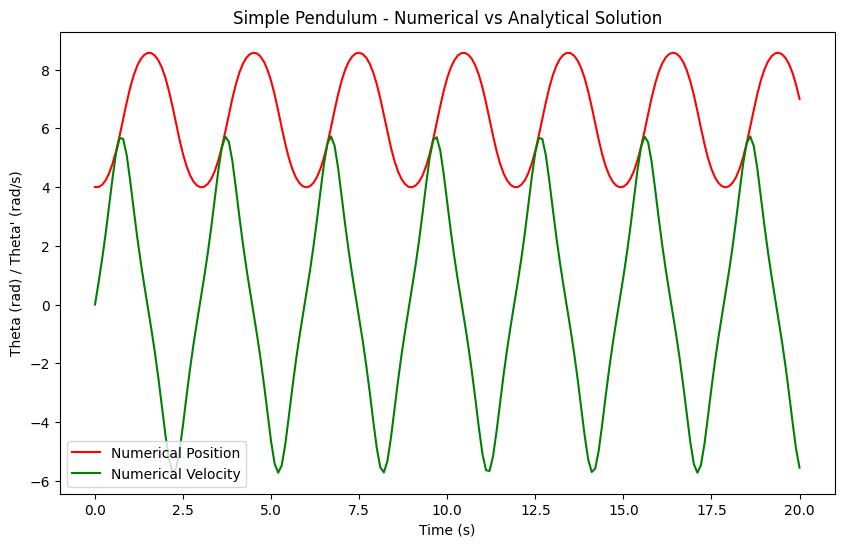

In [13]:
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1     # length of pendulum (m)
b = 0     # damping factor (zero for undamped case)
c = g / l  # natural frequency squared

# Define f for the pendulum system
def f(t, thetaprime, theta):
    return -b * thetaprime - c * np.sin(theta)

# Numerical solution
t_values, theta_values, thetaprime_values = SecondOrder(f, 200, 0.1, [0, 4.0, 0])

# Analytical solution
test_t = np.linspace(0, 20, 200)
#analytical_theta = 4.0 * np.cos(np.sqrt(g / l) * test_t)             ### this analytical solution for small angle approximation thus mismatches with plot 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, theta_values, 'r-', label='Numerical Position')
plt.plot(t_values, thetaprime_values, 'g-', label='Numerical Velocity')
#plt.plot(test_t, analytical_theta, 'k--', label='Analytical Solution')
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad) / Theta\' (rad/s)")
plt.legend()
plt.title("Simple Pendulum - Numerical vs Analytical Solution")
plt.show()


- With damping

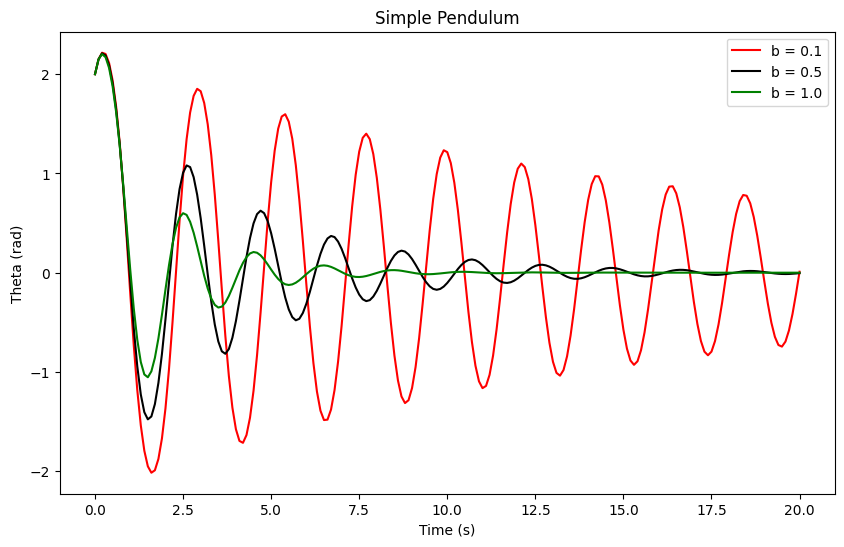

In [14]:
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1     # length of pendulum (m)
b = [0.1, 0.5, 1]     # damping factor (zero for undamped case)
c = g / l  # natural frequency squared

# Numerical solution
t_values0, theta_values0, thetaprime_values0 = SecondOrder(lambda t, thetaprime, theta: -b[0]*thetaprime - c*np.sin(theta), 200, 0.1, [0, 2.0, 1.5])
t_values1, theta_values1, thetaprime_values1 = SecondOrder(lambda t, thetaprime, theta: -b[1]*thetaprime - c*np.sin(theta), 200, 0.1, [0, 2.0, 1.5])
t_values2, theta_values2, thetaprime_values2 = SecondOrder(lambda t, thetaprime, theta: -b[2]*thetaprime - c*np.sin(theta), 200, 0.1, [0, 2.0, 1.5])


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values0, theta_values0, 'red', label='b = 0.1')
plt.plot(t_values1, theta_values1, 'black', label='b = 0.5')
plt.plot(t_values2, theta_values2, 'green', label='b = 1.0')

plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.title("Simple Pendulum")
plt.show()


- Driven oscillator

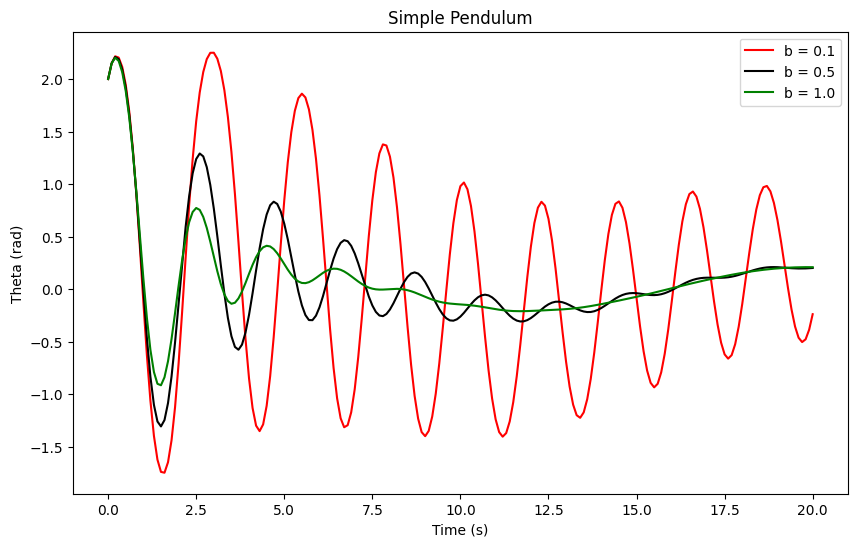

In [15]:
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1     # length of pendulum (m)
b = [0.1, 0.5, 1]     # damping factor (zero for undamped case)
c = g / l  # natural frequency squared

# Numerical solution
t_values0, theta_values0, thetaprime_values0 = SecondOrder(lambda t, thetaprime, theta: -b[0]*thetaprime - c*np.sin(theta) + 2*np.sin(0.4*t), 200, 0.1, [0, 2.0, 1.5])
t_values1, theta_values1, thetaprime_values1 = SecondOrder(lambda t, thetaprime, theta: -b[1]*thetaprime - c*np.sin(theta)+ 2*np.sin(0.4*t), 200, 0.1, [0, 2.0, 1.5])
t_values2, theta_values2, thetaprime_values2 = SecondOrder(lambda t, thetaprime, theta: -b[2]*thetaprime - c*np.sin(theta)+ 2*np.sin(0.4*t), 200, 0.1, [0, 2.0, 1.5])


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values0, theta_values0, 'red', label='b = 0.1')
plt.plot(t_values1, theta_values1, 'black', label='b = 0.5')
plt.plot(t_values2, theta_values2, 'green', label='b = 1.0')

plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.title("Simple Pendulum")
plt.show()


# 2. Improved methods

The exist two useful solvers:
- Old: scipy.integrate.oldeint
- New: scipy.integrate.solve_ivp

### Example 2) Time-amplified decay

$ \dot{y} = -ayt$ or

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt$$

Analytical solution: $ y(t)=y_0 \exp(-t^2a/2)$

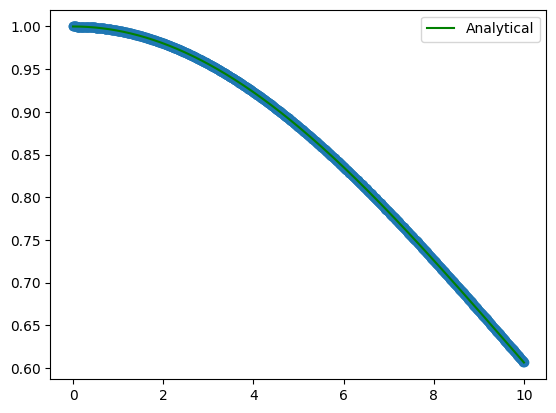

In [20]:
### Old method
def eulerode(f, h, N, ic):
    """ Euler ODE solver

    Args:
        f (function): function
        h (float32): step size
        N (float32): total time steps
        ic (list): initial condition [t0, y0]
    """
    t = ic[0]
    y = ic[1]
    t_values = [t]
    y_values = [y]
    for i in range(1, N+1):
        y = y + f(t, y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
        
    return t_values, y_values

f = lambda t, y: -0.01*y*t
t_values, y_values = eulerode(f,0.01, 1000, [0, 1])
t_ana = np.linspace(0, 10, 1001)

def f_analytical(a,t):
    return np.exp(-t**2 * a/ 2)


plt.scatter(t_values, y_values)
plt.plot(t_ana, f_analytical(0.01, t_ana), 'green', label= 'Analytical')
plt.legend()
plt.show()


## As a increases decay happens more instantly

- New results (solve_ivp)

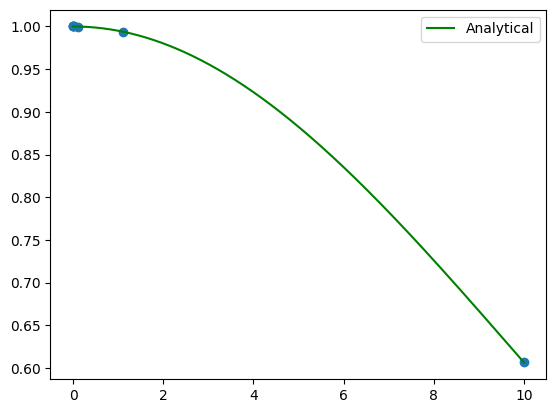

In [ ]:
solution_RK45 = integrate.solve_ivp(f, [0, 10], [1], method= 'RK45')

plt.scatter(solution_RK45.t, solution_RK45.y)
plt.plot(t_ana, f_analytical(0.01, t_ana), 'green', label= 'Analytical')
plt.legend()
plt.show()

## its two fast method than above manual where lot of points required.

### Example 3) Free fall

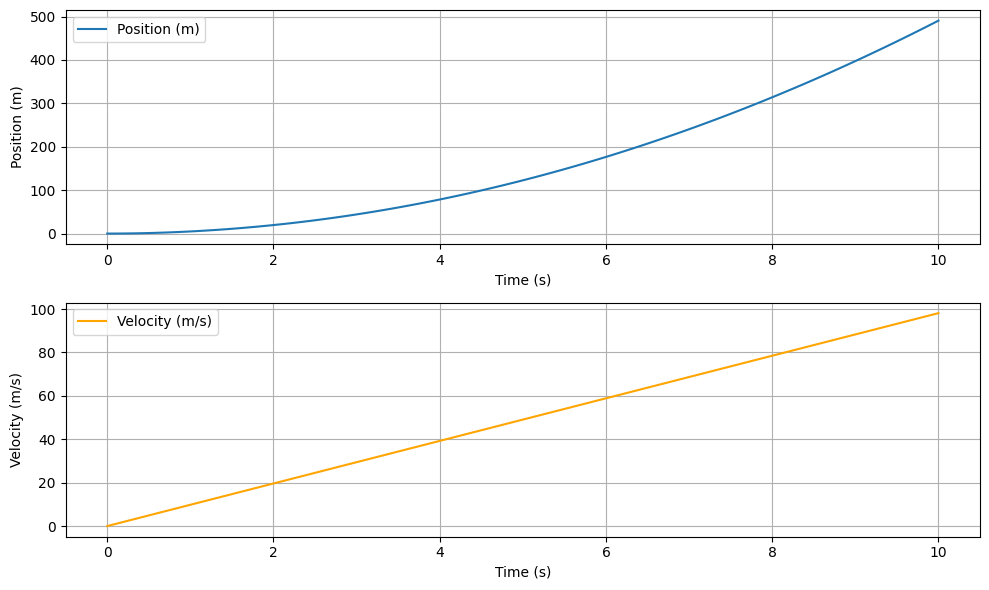

In [28]:
m = 70
g= 9.81
k = 0.0

def free_fall(t, y):
    x, v = y
    dx_dt = v
    dv_dt = g - (k/m)*v
    return [dx_dt, dv_dt]

## initial conditions
x0 = 0.0
v0 = 0.0
y0 = [x0, v0]

## time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)

solution = integrate.solve_ivp(free_fall, t_span, y0, method= 'RK45', t_eval= t_eval)

time = solution.t
position = solution.y[0]
velocity = solution.y[1]
# Plotting the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, position, label="Position (m)")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (m/s)", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Example 4) Driven pendulum

- New results (solve_ivp)

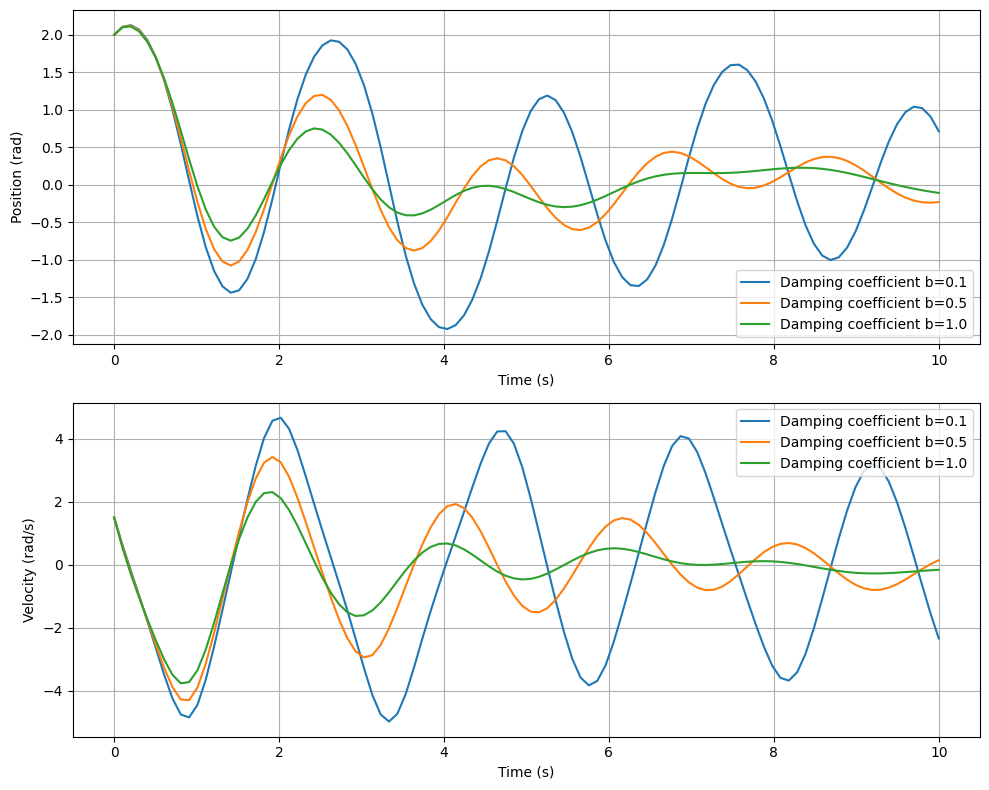

In [30]:
b_values = [0.1, 0.5, 1.0]   ## damping coefficient
l = 1.0   ## length of pendulum
g = 9.81   ## gravity
c = 9.81   ## c = (g /l)


def driven_pendulum(t, y, b):
    theta, thetaprime = y
    thetadt = thetaprime
    thetaprimedt = -b*thetaprime - c*np.sin(theta) + 2*np.sin(t)
    
    return [thetadt, thetaprimedt]

## initial condition
theta0 = 2.0
thetaprime0 = 1.5
y0 = [theta0, thetaprime0]

## time span
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)

plt.figure(figsize= (10, 8))
for b in b_values:
    solution = integrate.solve_ivp(driven_pendulum, t_span, y0, args=(b,), method='RK45', t_eval=t_eval)
    time = solution.t
    position = solution.y[0]
    velocity = solution.y[1]
    
    # Plot position
    plt.subplot(2, 1, 1)
    plt.plot(time, position, label=f"Damping coefficient b={b}")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (rad)")
    plt.legend()
    plt.grid()
    
     # Plot velocity
    plt.subplot(2, 1, 2)
    plt.plot(time, velocity, label=f"Damping coefficient b={b}")
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (rad/s)")
    plt.legend()
    plt.grid()
    
plt.tight_layout()
plt.show()


### Compare more methods

In [31]:
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]
# methods:
# RK45
# RK23
# DOP853
# Radau
# BDF
# LSODA

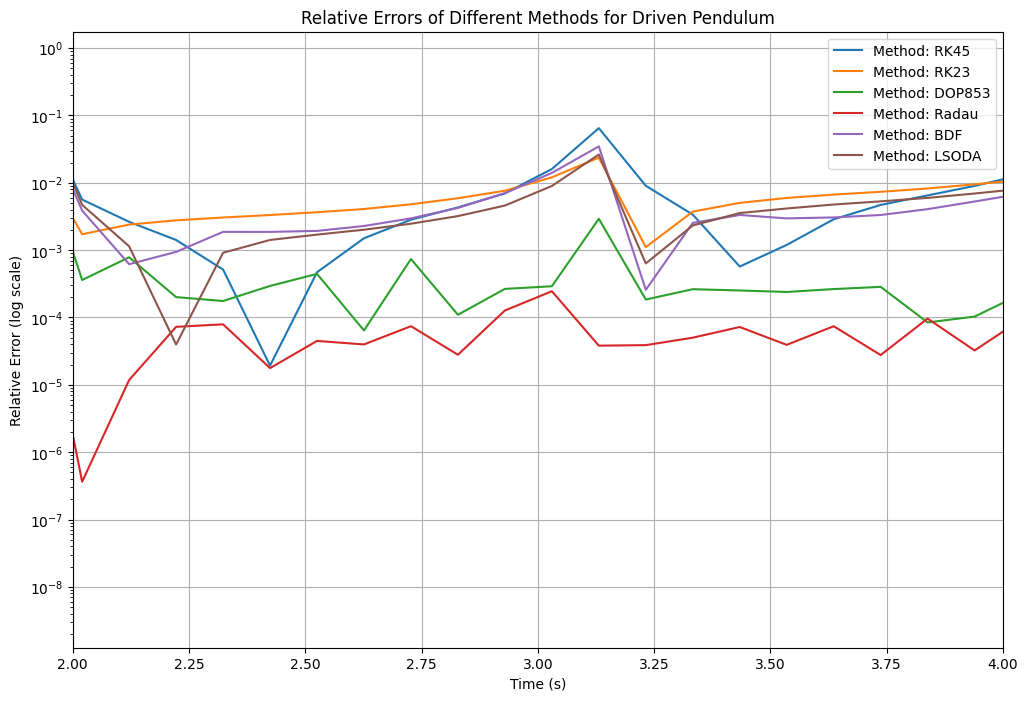

In [34]:
b = 0.5  # Damping coefficient
l = 1.0  # Length of pendulum (m)
g = 9.81  # Gravity (m/s^2)
c = g / l  # c = g / l

# Define the ODE system
def driven_pendulum(t, y):
    theta, thetaprime = y
    thetadt = thetaprime
    thetaprimedt = -b * thetaprime - c * np.sin(theta) + 2 * np.sin(t)
    return [thetadt, thetaprimedt]

# Initial conditions
theta0 = 2.0
thetaprime0 = 1.5
y0 = [theta0, thetaprime0]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(0, 10, 100)

# Methods to compare
methods = ['RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA']
solutions = {}

# Reference solution using high-accuracy method
ref_solution = integrate.solve_ivp(driven_pendulum, t_span, y0, method='DOP853', t_eval=t_eval, rtol=1e-10, atol=1e-12)

# Solve with all methods and store results
for method in methods:
    sol = integrate.solve_ivp(driven_pendulum, t_span, y0, method=method, t_eval=t_eval)
    solutions[method] = sol

# Compute relative errors
relative_errors = {}
for method, sol in solutions.items():
    ref_position = ref_solution.y[0]
    rel_error = np.abs(sol.y[0] - ref_position) / np.abs(ref_position)
    relative_errors[method] = rel_error

# Plotting results
plt.figure(figsize=(12, 8))

# Plot relative errors
for method, rel_error in relative_errors.items():
    plt.plot(t_eval, rel_error, label=f'Method: {method}')

plt.xlim(2, 4)
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Relative Error (log scale)')
plt.title('Relative Errors of Different Methods for Driven Pendulum')
plt.legend()
plt.grid()
plt.show()


## 3. Theory of the Runge-Kutta methods

There exist several different Runge-Kutta methods

Derivation is difficult: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge%E2%80%93Kutta_fourth-order_method

### 3.1 Implementation of RK4

In [35]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method]

def rk4(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        k = 1/6*k1 + 1/3*k2 +1/3*k3 + 1/6*k4
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

### 3.2 Implementation of RK45

In [36]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]
def rk45(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + h*3/8, y + k1*3/32 + k2*9/32)
        k4 = h * f(t+h*12/13, y+k1*1932/2197-k2*7200/2197+k3*7296/2197)
        k5 = h * f(t+h, y+k1*439/216-k2*8+k3*3680/513-k4*845/4104)
        k6 = h * f(t+h*1/2, y-k1*8/27+k2*2-k3*3544/2565+k4*1859/4104-k5*11/40)
        k = 16/135*k1 + 0*k2 +6656/12825*k3 + 28561/56430*k4 -9/50*k5 + 2/55*k6
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])


### 3.3 Comparison with Euler method

C:\Users\disha\AppData\Local\Temp\ipykernel_31736\451487175.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


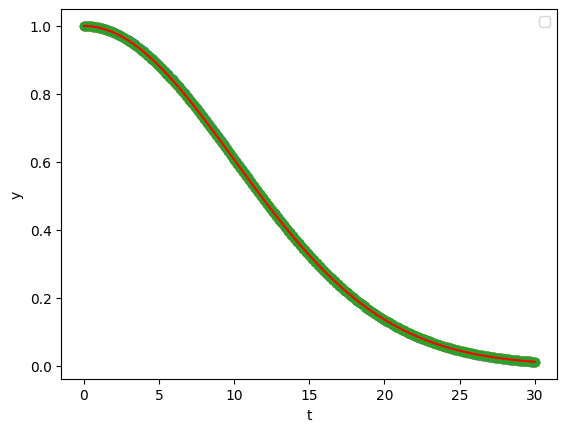

In [38]:
a = 0.01

# Define function
def f_ODE(t,y):
    return -a*y*t

# Call Euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1

solution_euler = eulerode(f_ODE, h, nmax, [t0, y0])
solution_rk4 = rk4(f_ODE, t0, y0, nmax,h)
solution_rk45 = rk45(f_ODE, t0, y0, nmax,h)

test_t = np.linspace(0, nmax*h, nmax+1)
test_y = y0*np.exp(-test_t**2*a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution_euler[0], solution_euler[1])
plt.scatter(solution_rk4[0], solution_rk4[1])
plt.scatter(solution_rk45[0], solution_rk45[1])
plt.legend()
